## Content

| Topic|Time|
|-|-|
| Business Case | 5 mins|
| What is Clustering? | 3 mins|
| Clustering Intuition | 10 mins|
| Dunn Index | 15 mins |
| K-Means and its Math Formulation | 25 mins |
| Lloyd's Algorithm | 11 mins |
| K-Means Scratch Implementation | 20 mins |
| Determining K  and Silhouette Score | 8 mins |
| Amazon's Customer Segmentation with K-Means | 13 mins |
|Total|1 Hrs 50 mins|

***

#**Business Case**

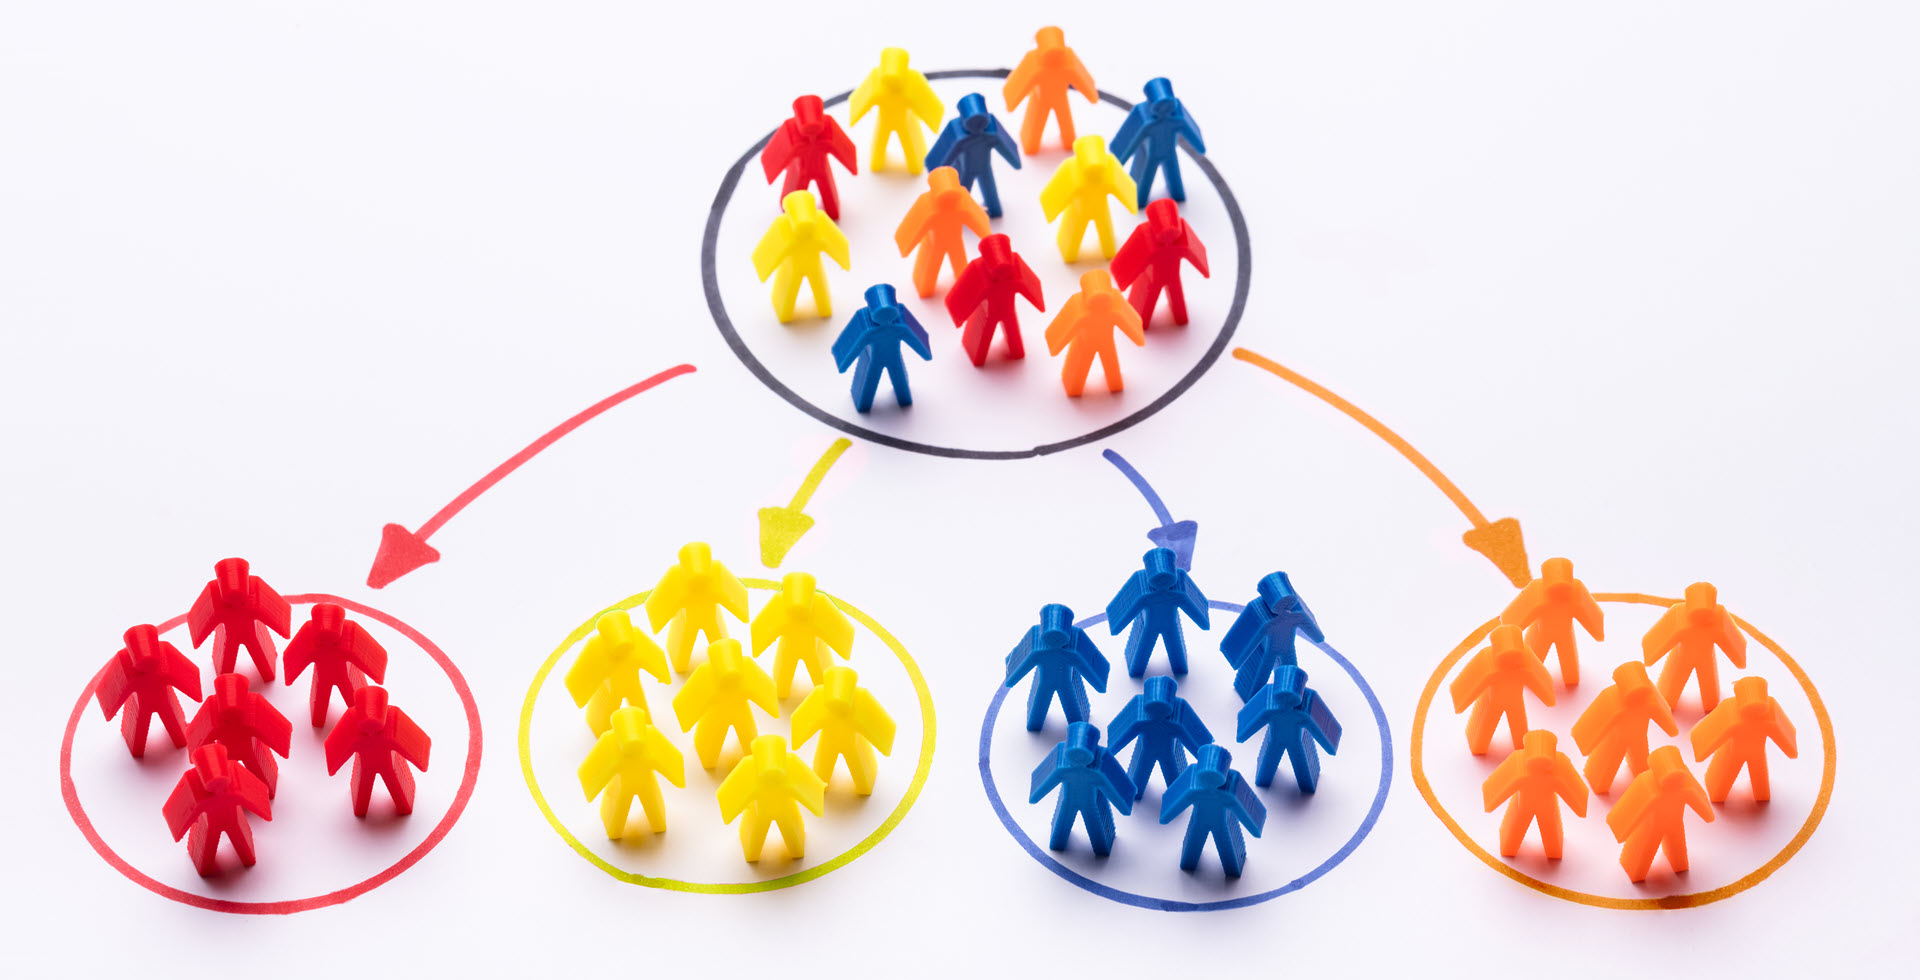



As a data scientist at **Amazon**, you are given a dataset that has details about different customers with features like
- 'ID',
- 'n_clicks',
- 'n_visits', etc,

<br>

You are asked to **group/segment** these customers so that:
- The company can provide relevant and similar items to their customers, which will increase their overall sale.

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2022-11-16 01:59:05--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 74.125.202.138, 74.125.202.102, 74.125.202.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.202.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0si5gqt4sca6n2mq8vmt7nchoo27b12v/1668563925000/10306167880925931714/*/1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W?e=download&uuid=4c10abfe-37bd-436c-95bd-8496ec6da333 [following]
--2022-11-16 01:59:05--  https://doc-10-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0si5gqt4sca6n2mq8vmt7nchoo27b12v/1668563925000/10306167880925931714/*/1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W?e=download&uuid=4c10abfe-37bd-436c-95bd-8496ec6da333
Resolving doc-10-64-docs.googleusercontent.com (doc-10-64-docs.googleusercontent.com)... 64.233.183.132, 2607:

Let's look at the provided features in our dataset.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./E-commerce.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


**observe:**

- There is **no target variable** ($y$) for the records in the dataset.


#### With no $y$ in the data, can we use Logistic Regression ?

Ans: Clearly with no $y$, we cannot use Logistic Regression model

- In fact, we cannot use any Supervised Learning methods to solve our problem

<br>


#### What method to use when there is no $y$ ?

Ans: Recall from the **intro to ML lecture**, there was Unsupervised method which
- Uses algorithms to discover hidden patterns in data without the need for human intervention

<br>

#### Which Unsupervised algorithm will work in our **grouping of customer problem** ?

Ans: **Clustering**




# **What is clustering?**


In simple terms clustering is a task of grouping similar objects or data-points.

Lets consider our Business Case:

- Supposedly we plot the 2 features **amt_spent and n_visits**(number of visits to the cite)

- through the plot, its clear there are three major groups of Customers (**$C_1, C_2, C_3$**) based on these 2 features where:

  1. **$C_1$** can be taken as Shopoholics ( Very frequently buys product and visit website )
  2. **$C_2$** can be taken as Window Shoppers ( visits website frequently but not buy item )
  3. **$C_3$** can be taken as High Net Worth ( visits less but spends on expensive items)


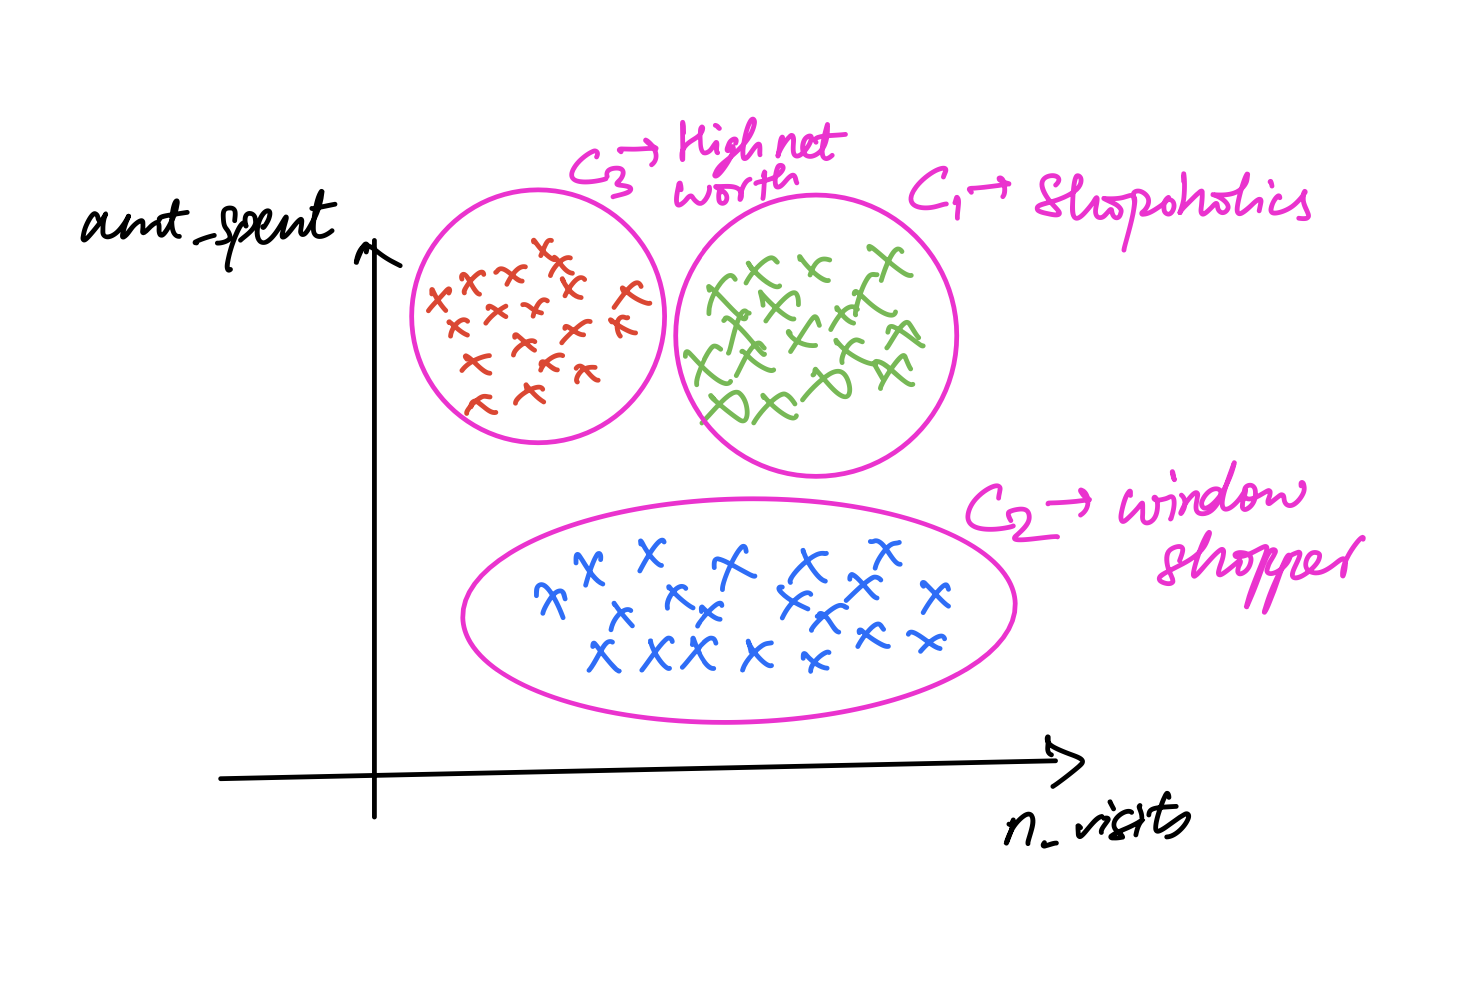

#**Intuition of Clustering:**



- Intuitively, Clustering is the task of dividing the population or data points into a number of groups such that data points which are similar are closer and in the same group than the dissimilar points.

- Each group in clustering is called a **cluster**.
 - The points in the same cluster are more closer and similar to each other.
 - The points in different clusters are more distant and distinct from each other.

- So, the task in clustering is **grouping the points of similar kind** based on **our definition of similarity**.


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/120/original/Screenshot_2022-07-29_at_3.43.55_PM.png?1659089170' height = '500' width = '800'>




**Q. What to we understand by term Similarity ? How to decide which points are similar?**

- Similarity in clustering can be defined as the closeness of data points with each other

- For example, customers who spend almost equal amount of money on shopping on amazon can be similar.

- Similarity can be measured using different distance metrics.

> **Q. How can we ensure clustering is good or bad?**

- Since **clustering doesn’t have the class labels or the ground truth**, it is hard to measure if a clustering is good or bad in a very rigorous and critical way.

- It all depends on the problem and the context we are working in, i.e., the **Business Case**

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/121/original/Screenshot_2022-07-29_at_3.45.32_PM.png?1659089264' height = '500' width = '800'>

**Clustering, just like classification, is very dependent on the features used.**

- The **clustering output can sometimes help coming up with new features**.

- If we get a **new datapoint** in future, for example, **a new customer at Amazon**, we can identify which cluster or group does this new datapoint or this new customer belongs to.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/122/original/Screenshot_2022-07-29_at_3.46.25_PM.png?1659089315' width="500">

---


**Now that we have seen the intuition of clustering let's look at few terms and concepts we should be aware about during clustering on any dataset.**

# **Intra-cluster and Inter-cluster Distance**



- Imagine two clusters $C_{1}$ and $C_{2}$ based on some feature $f_{1}$ and $f_{2}$.

- Inter-cluster distance represents the distance between two clusters $C_{1}$ and $C_{2}$.


<br>


#### **How to calculate the distance between 2 clusters ?**

Ans: There are many ways like :
  - Distance between average values of the clusters.
  - Distance between closest points from the clusters (min distance)
  - Distance between farthest points from the clusters (max distance)

<br>

Intra-cluster distance represents the distance within a certain cluster.
- Basically , it measures how tightly the points of a clusters are packed.

#### **How to calculate the intra-cluster distance ?**
Again there are more than one way to measure intra-cluster distance:
  - Average distance between the points of a cluster.
  - Distance between farthest points of a cluster

<br>

#### **Q. How to determine which approach to use to calculate these distances?**
- There is no right or wrong approach. All these ideas are valid and which one to choose depends on the use-case and domain that we're working on.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/124/original/Screenshot_2022-07-29_at_3.49.42_PM.png?1659089519' height = 500 width = 800>

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/010/017/original/Screenshot_2022-09-08_at_10.03.24_PM.png?1662654263' width="500">


**Q. What should be the ideal values of inter and intra cluster distances of a clustering?**

- Ideally, **intra-cluster** distance should be **low**
- If the intra cluster distance will be low, the points in the same clusters will be more similar

- And, **inter-cluster** distance should be **high**.
- Incase of higher inter cluster distances, the points in different clusters will be less similar.

#### **Q. How can we calculate the distances between the points and clusters?**

Recall from the pre-read, we can use the following distances for calculating the similarity:-
- **Euclidean distance**
 - It is preferred in low dimensional space.
- **Manhattan distance**
 - It is used in low-medium dimensional space
- **Cosine similarity**
 - It is used in high-dimensional space.

Practically speaking distance-metric used is hyperparameter and is **application based.**


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/299/original/Screenshot_2022-08-02_at_3.34.46_PM.png?1659434213' height = '500' width = '800'>

#### **Q. If only one of the inter-cluster distance or intra-cluster distance is given, can you really judge how good or bad the formed clusters are?**

Ans: No, because:

- It is not necessay that if inter cluster distance is very high, intra-cluster will be low

- Similarly just having a smaller intra cluster distance also does not guarantee good clustering results.

<br>

#### Q. Then what metric can we use to evaluate our Clustering?

Ideally, the resultant clusters should make **business sense**

- Say that you are working for a shirt manufacturing company, then you should have 3 clusters: small, medium, large.

- It does not make sense to have 100 clusters!

- To evaluate the results of clustering, we can also use the same distance metrics we used for supervised learning problems, like Euclidean Distance,etc.


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/123/original/Screenshot_2022-07-29_at_3.47.54_PM.png?1659089419' height = 500 width = 800>




#**Dunn Index**

As looking at the resultant clustering is not the most realible source mathematically:
- Let's look at one more metric which includes inter and intra cluster distance to evaluate clustering.

- **Dunn index** is a metric for evaluating clustering algorithms

- The objective of **Dunn index** is to identify clusters that are:
 - compact with a small variance between members of the cluster
 - and well separated.

<br>

####**Q. How can we calculate Dunn Index?**
- It is denoted by **‘D’** and is given as:

$D = \frac{min_{i,j} distance(i,j)}{max_k distance^{'}(k)}$

where;
- $distance(i,j)$ → distance between the farthest points of the clusters $C_i$ and $C_j$ → **Inter-Cluster distance**

- ${distance^{'}(k)}$ → distance between the farthest points within the $k^{th}$ clusters **Intra-Cluster distance**

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/125/original/Screenshot_2022-07-29_at_3.53.47_PM.png?1659089763' height = '500' width = '800'>


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/126/original/Screenshot_2022-07-29_at_3.56.07_PM.png?1659089899' height = '500' width = '800'>



#### **Q. What can we say if Dunn index is high ?**
Ans: it implies that clusters are well separated and the points in the same cluster are intact.

<br>

Summarizing the interpretability of Dunn Index:

- For every pair of points from $C_i$ and $C_j$, we have to compute **$distance(i,j)$** for getting the inter cluster distance.
- Similarly for calculating the **$distance'(k)$** we will have to iterate through each pair of points within $k^{th}$ cluster

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/127/original/Screenshot_2022-07-29_at_3.57.44_PM.png?1659089997' height = '500' width = '800'>


- **For ideal clustering, the value of the Dunn Index should be high**

- For this, the distances between the points in the same cluster should be lower, and the distance between the different clusters should be higher.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/128/original/Screenshot_2022-07-29_at_4.01.33_PM.png?1659090224' height = '500' width = '800'>

#### If there is two clustering algorithms with different clusters which one to choose ?

Ans:  we can compare the Dunn Index of the two algorithms and pick the one with higher Dunn Index.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/129/original/Screenshot_2022-07-29_at_4.02.25_PM.png?1659090275' height = '500' width = '800'>

**But why we chose maximum intra-cluster distance and minimum inter-cluster distance to use in Dunn-index?**

- max intra-cluster and min inter-cluster distances are chosen in order to handle the extreme worst case scenarios.

Consider the following two cases, which do you think represent better clustering? Case1 or Case2.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/227/original/Screenshot_2022-08-01_at_1.58.35_PM.png?1659342098' height = '500' width = '800'>

- If we'd have chosen max inter-cluster distance,
 - metric of case1 will be higher but it shouldn't be the case as it's not the ideal situation,
 - here the 4th cluster in case1 is just an outlier and its extremely affecting the metric due to which we use minimum of inter-cluster distances.

 - incase of max inter-cluster, it would always choose the clustering algorithm where one cluster is far from the other clusters and the remaining clusters are very close to each other, which is not correct.


**Is there any range of Dunn-index, how to say if a value of Dunn-index is good or bad?**
- There is no such good or bad range of values for Dunn-index.
- For an instance say your min inter-cluster distance is 10 times the max intra-cluster distance, it will be a good clustering but its just a comparative analysis.
- For analysing models using Dunn-index:
 - we can find the values of the metric for a random clustering algorithm and
 - then compare it with the values of metric for different clustering algorithms to find out whether the algorithm is performing better or worse than a random model.
---

#**K-Means Clustering introduction**



- K-Means clustering is one of the most popular and the simplest clustering
algorithms. The value **'K' in the K-means algorithm denotes the number of
clusters**.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/130/original/Screenshot_2022-07-29_at_4.04.01_PM.png?1659090377' height = '500' width = '800'>

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/131/original/Screenshot_2022-07-29_at_4.05.12_PM.png?1659090450' height = '500' width = '800'>



- Consider a 2-Dimensional dataset $D$ with number
of clusters (K) = 3. So the number of centroids should also be equal to 3.

- A centroid of a cluster is the middle point of the cluster which can be calculated using average of points.

- Let 'S1', 'S2', 'S3' be different sets of elements of different clusters, and ‘C1’, ‘C2’ and ‘C3’ be their respective cluster centroids.

  $S_1 ∪ S_2 ∪ S_3 = D$

  $S_1 ∩ S_2 ∩ S_3 = Φ$

  $S_1 ∩ S_2 = Φ, S_1 ∩ S_3 = Φ, S_2 ∩ S_3 = Φ$



- **Q. What does this indicate?**

  - This indicates the fact that all the data points belong to one or the other set and no data point exists in more than one set or cluster.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/132/original/Screenshot_2022-07-29_at_4.07.21_PM.png?1659090573' height = '500' width = '800'>

Thus,

Number of Sets = K (i.e., $S_1, S_2, S_3, ….., S_k$), and

Number of centroids = K (i.e., $C_1, C_2, C_3, ….., C_k$).


Now, consider a set of points $S_i$ of size $|S_i|$. We can find the centroid of this set by summing all the points in the set (x_j) and averaging them by the size of the set ($|S_i|$).

  - $C_i$ = $\Large\frac{1}{|S_i|} ∑_{x_j ∈ S_i} x_j$

Now, K-means clustering is a **centroid-based** clustering scheme.

- Every point is assigned to the cluster closest to it.

- The core idea of K-means clustering is to find 'K' centroids and each point is assigned to the cluster whose centroid is nearest to it.

- The biggest challenge is to find these 'K' centroids.

- There are algorithms to find out these 'K' centroids and one of the most commonly used algorithms is **Lloyd's algorithm**.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/133/original/Screenshot_2022-07-29_at_4.08.31_PM.png?1659090646' height = '500' width = '800'>

Now that we've seen  a high level approach, let's now move to mathematical formulation of K-Means.

# K-Means: Mathematical Formulation: Objective Function



**Q. What do we optimize in K-Means? What is our end-goal?**

- Given a dataset $D$ where each point $x_i ∈ R^d$, we want to find clusters '$S_1$', '$S_2$’, '$S_3$', …., '$S_k$' and their corresponding centroids '$C_1$', '$C_2$', '$C_3$', …., '$C_k$' such that;
  1. the inter-cluster distance is maximum
  2. the intra-cluster distance is minimum


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/134/original/Screenshot_2022-07-29_at_4.10.14_PM.png?1659090747' height = '500' width = '800'>


**Since we're trying to optimization problem, Can we use Gradient Descent to converge the K-Means Clustering Algorithm?**

- In clustering, clusters are always represented using discrete variables.

- When we apply Gradient Descent the variables can become fraction which shouldn't be the case as it should only be discrete values.

- The values cannot be a fraction as a point can either belong to a set or not, so GD does not work. And, which is why Gradient Descent fails here.



**Q. What is the problem with value of clustering variables being fractional?**

- If variable is fractional,
 - it would mean that the a particular point is partially belonging to ith cluster as well as some other cluster as well

 - This kind of clustering is called **Fuzzy-clustering**/**Soft-clustering**.

- To solve this optimization problem with the integer constraints we will have to use the integer programming which will have NP-hard or exponential complexity.

- This optimization problem is very hard to solve due to which it's not used in real life applications.

- In such cases where the complexity of problem becomes very large, we optimize with the approximation algorithms and find out nearest solutions to the problems.

One such approximation algorithm is **Lloyd’s algorithm**. It is a very simple and a good approximation algorithm.

- Approximation algorithms do not guarantee best solutions but they work well in practice.

So, let's see how this works. Coming up is Llyod's Algorithm.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/140/original/Screenshot_2022-07-29_at_4.15.24_PM.png?1659091061' height = '500' width = '800'>

---



# K-Means Algorithm (Lloyd’s Algorithm)



Lloyd' algorithm is an approximation method we use for k-means clustering, which involve 4 major steps:


**1. Initialization**

From the given dataset '**D**', we pick '**K**' points randomly, and assume them to be the initial centroids. Let us denote them as $C_1, C_2, C_3, …, C_k$.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/141/original/Screenshot_2022-07-29_at_4.18.21_PM.png?1659091230' height = '500' width = '800'>


**2. Assignment**

For each point '$x_i$' in the dataset '**D**', we have to compute the distance of each of the above 'K' centroids, and pick the nearest centroid. Let us denote this nearest centroid as '$C_j$'.

Add the point '$x_i$' to the set '$S_j$'(which is associated with the centroid '$C_j$').

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/142/original/Screenshot_2022-07-29_at_4.19.16_PM.png?1659091285' height = '500' width = '800'>


**3. Recompute Centroid (Update Stage)**

- Now  that we've grouped all the datapoints to each clusters, we update the centroid for each and every clusters.


- We recompute/update '$C_j$' as follows:

    - $C_j = (1/|S_j|) * Σ_{x_i∈S_j} x_i$

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/143/original/Screenshot_2022-07-29_at_4.20.53_PM.png?1659091397' height = '500' width = '800'>


**4. Repeat the assignment and update steps until convergence**.

**Q. How do we know if algorithm has converged?**

- Here convergence is the stage where the centroids do not change much.

- For example, after second iteration, if the centroids are $\{C_1, C_2, C_3, …., C_k\}$ and 3rd iteration, if the updated centroids are $C_1$', $C_2$', $C_3$', ….., $C_k$', we say the algorithm has converged if the distance between old centroids and updated centroids is very low.


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/144/original/Screenshot_2022-07-29_at_4.22.29_PM.png?1659091481' height = '500' width = '800'>


- After convergence, we get centroids as $C_1, C_2, C_3, …., C_k$ and the final sets/clusters as $S_1, S_2, S_3, …., S_k$.


Now, let's see how to implement K-Means from scratch.

# Determining the right ‘K’

**Q. How to determine the right value of K? It is 3? It is 10, or 100, or N?**


**How do we determine the right k?**
- In K-Means, **$K$** is a hyperparameter and it can be determined through:

1. **Domain Knowledge**

  - If our problem contains a fixed number of clusters/groups all the time, then ‘**K**’ will be determined using the domain knowledge.

2. **Elbow Method or Knee Method**

 - In this method, we calculate something known as **Within-Cluster Sum of Square (WCSS)**

- WCSS is the sum of squares of the distance of each datapoints present in dataset, to their assigned cluster centroids.

- Suppose there are three centroids $C_1$, $C_2$, and $C_3$. The WCSS will be calculated as follows:

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/067/original/IMG_0013.PNG?1663775769" height = '500' width = '800'>


**Q. How to determine the right $K$ from some distance?**

- To answer this, consider if there were only one cluster. In that case WCSS would be very high, because the distance of all the points with only one centroid would be considered.

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/069/original/1_0naSz4RFw_m5VqiRXo2SRw.png?1663776597" height = '500' width = '800'>


- What we do is, we calculate WCSS for different values of K, and plot the
WCSS with the values of K.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/071/original/1_vLTnh9xdgHvyC8WDNwcQQw.png?1663776770' height = '500' width = '800'>

- We pick the value of K after which the WCSS stabilizes and does not significantly decrease as we increase the value of K.

<img src = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/072/original/IMG_0014.jpg?1663777180" height = '500' width = '800'>

**Q. Why not pick the K with the lowest value of WCSS?**
- The value of WCSS would be the lowest (equals to $0$) when each and every point in the dataset is a cluster itself.

- This is not what we would want as a result of clustering, is it?

#Amazon Customer's Segmentation


Now that we've understood how K-Means work. Lets come back to the Amazon customers' segmentation.

But first, Let's visualize if there are any patterns between two features.

**Q. which plot do you think can help us in identifying whether there is a cluster or not, with different pairs of variables?**

- Pairplot

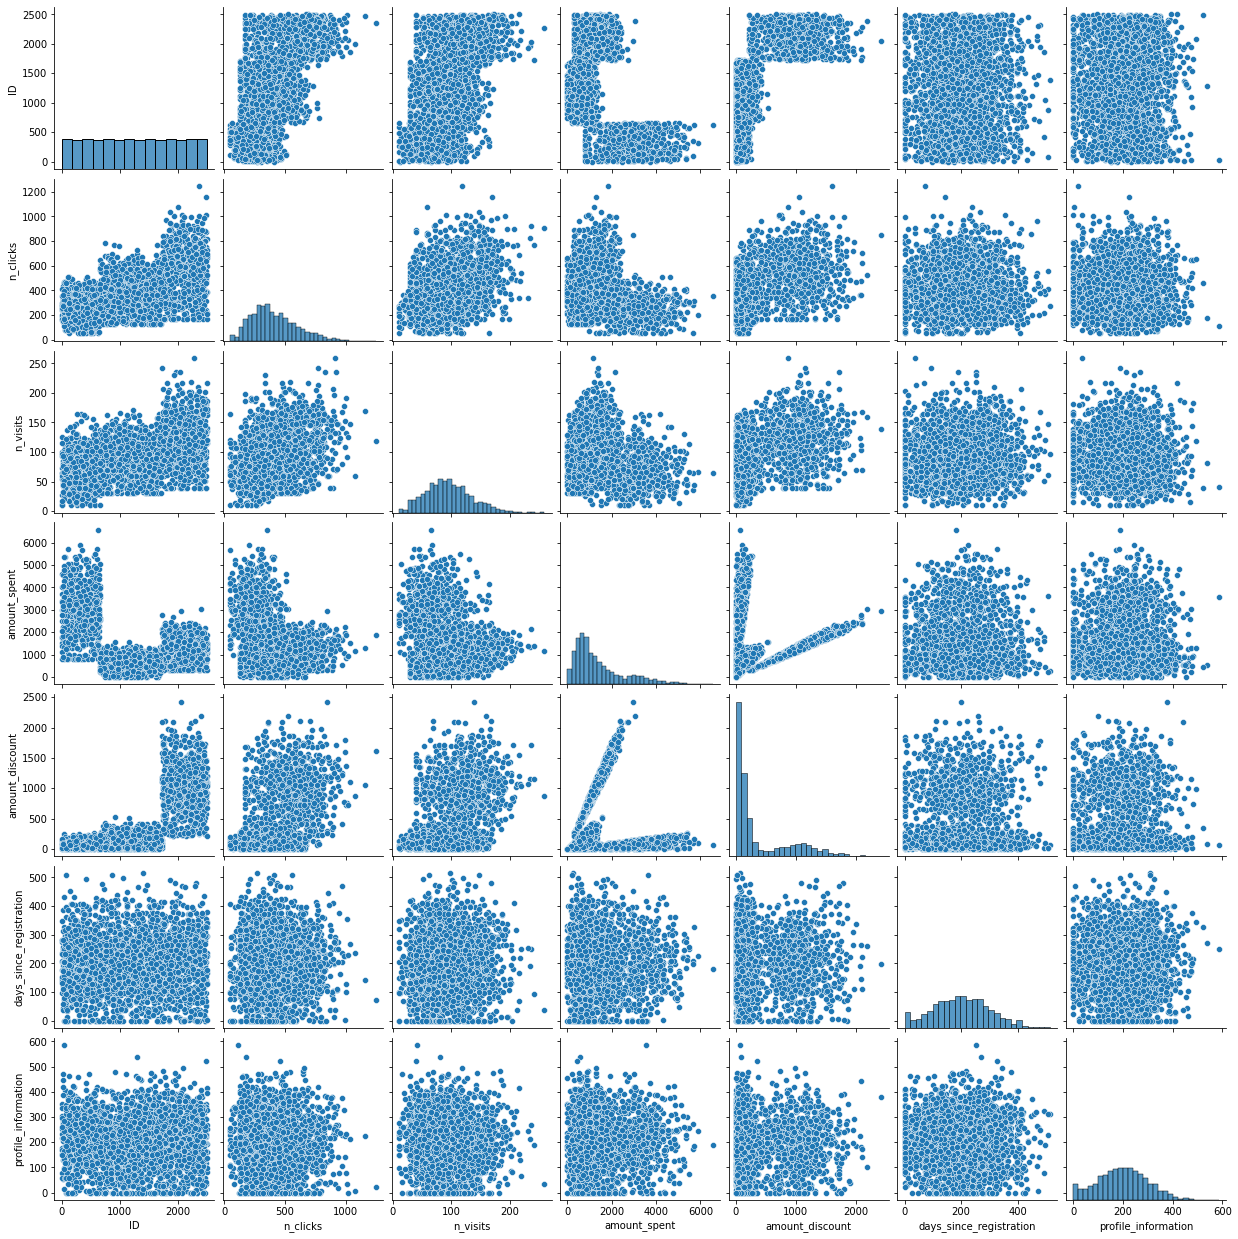

In [ ]:
sns.pairplot(df)

From pairplot, we can see:

- With multiple variables(dimensions), it is easier to identify patterns or if some data points are closer together forming cluster, using pairplot.

- Points that are closer together should have similar behaviour or characteristics.

#### **What could be the benefits of identifying patterns and groups in this data?**

If we can clearly distinguish these groups (segregate customers), the Amazon can:

- offer/show more discounted items to people who always buy discounted items

- show quality products to people who buy expensive products or buy more often,

- identify segment of customer who explore a lot but don't end up buying

**In the dataset we imported above, do you think variable 'ID' will be helpful for us while clustering using the same loss function we have defined?**

- No
- Euclidean distance is not the correct distance metric to use incase of categorical variable, as the euclidean distance between two instances of a categorical variable don't make sense.
- We shouldn't use categorical variable incase of K-means because the loss function we have defined in the objective is not suitable for a categorical variable, therefore let's drop it.


In [ ]:
X=df.drop("ID",axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


### **Cleaning + Preprocessing**

**Some things to note about this data**

- CustomerID is just an identifier of the customer - its not a required parameter.
- No categorical variable, but we would have discarded that as well.
- No missing values.

In [ ]:
X.describe()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,408.68000,94.475600,1445.090745,388.508637,200.973600,201.040400
std,186.41409,38.866356,1167.663473,487.143968,99.136618,100.139213
min,50.00000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,274.75000,67.000000,609.618538,56.298615,130.000000,132.000000
50%,378.00000,92.000000,1036.189112,137.454623,200.000000,201.000000
75%,522.00000,119.000000,1949.270949,679.540536,268.000000,270.000000
max,1246.00000,259.000000,6567.402267,2428.406527,514.000000,585.000000


### Feature Scaling
**Can you observe something about the ranges of the features?**

- Features are on different scales.

**Should we or should we not we scale the variables for K-means?**

- K-Means is a distance-based algorithm. Because of that, it’s really important to perform feature scaling (normalize, standardize, or choose any other option in which the distance has some comparable meaning for all the columns).

- For our use case, we can use MinMaxScaler instead of StandardScaler,  transforming the feature values to fall within the bounded intervals (min and max), rather than making them to fall around mean as 0 with standard deviation as 1 (StandardScaler).

- MinMaxScaler is an excellent tool for this purpose. MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005].

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

Let's use K-means from scikit learn library.

In [ ]:
from sklearn.cluster import KMeans

k = 4 ## arbitrary value
kmeans = KMeans(n_clusters=k,random_state = 42)
y_pred = kmeans.fit_predict(X)

Let's try to see what did the Kmeans predict?
- It predicted the cluster labels for all the points.

In [ ]:
y_pred

array([3, 3, 1, ..., 2, 0, 1], dtype=int32)

We can even retrieve the coordinates of centroids of clusters.

In [ ]:
##coordinates of the cluster centers
kmeans.cluster_centers_

array([[0.16763001, 0.23205394, 0.5132428 , 0.03436531, 0.378177  ,
        0.36612938],
       [0.45336783, 0.4704339 , 0.21776527, 0.47129454, 0.39159396,
        0.33704573],
       [0.28596261, 0.31562073, 0.107057  , 0.06272188, 0.23922278,
        0.33006642],
       [0.27325468, 0.32461027, 0.11241494, 0.06775629, 0.56591177,
        0.34694553]])

### Visualizing clusters

Let's create a dataframe where we will add a new column 'label' which will consist of the cluster labels assigned by k-means, for visualization purpose.

In [ ]:
clusters = pd.DataFrame(X, columns=df.drop("ID",axis=1).columns)
clusters['label'] = kmeans.labels_
clusters.head(3)

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,label
0,0.066890,0.220884,0.032571,0.013013,0.453307,0.401709,3
1,0.412207,0.144578,0.097333,0.002343,0.443580,0.290598,3
2,0.392977,0.369478,0.176234,0.347685,0.480545,0.699145,1


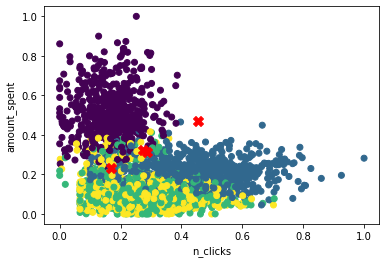

In [ ]:
def viz_clusters(kmeans):
    plt.scatter(clusters['n_clicks'], clusters['amount_spent'], c=clusters['label'])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                color="red",
                marker="X",
                s=100)
    plt.xlabel('n_clicks')
    plt.ylabel('amount_spent')

viz_clusters(kmeans)

- There is some distinction between clusters, but making sense out of this is a bit hard from this plot.

**A better alternative would be a line polar plot from plotly library - useful for visualizing multi-dimensional data**

- Group the customers by labels and calculate mean for all the features.
- Melt the data to have features on rows along with their corresponding mean values

In [ ]:
polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar, id_vars=["label"])
polar.head(4)

,label,variable,value
0,0,n_clicks,0.167630
1,1,n_clicks,0.453368
2,2,n_clicks,0.285828
3,3,n_clicks,0.273382


In [ ]:
import plotly.express as px

"""
  'polar' : customer dataset we are using
  'r' :  mean values for each feature which will be connected using lines
  'theta' : variables where each of the feature will have an angle and
            color will be based on the label of the clusters.
"""
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=700,width=800)
fig.show()


The reason this plot is called polar because all the coordinates are polar coordinates (i.e. circular)

#### **Insights**

- **Polar plot is read and interpreted radially**

  - values increase as we move away from the center, showing the influence of a feature on that label.
  - <font color="green"> green(2) </font> and <font color="purple"> purple(3) </font> overlap on all the features except one.

Looking at this plot, we have different  customer segments:
- **Bargain shoppers**(`label 1`) - people who buy heavily discounted items. **Action:** show them more discounted items. They are also frequent users who have joined the website relatively recent.

- **Inactive old users** (`label 2`) - people who have been a long time user of the app but have not shown much interest now. **Action:** start sending notifications, emails, etc - get them back on the platform.

- **New and inactive users** (`label 3`)- Users who have recently joined but haven't bought much and are not that actively looking for items. Somewhat similar to `label 2`.

- **Premium shopper** (`label 0`) - Affluent customers who don't visit the website very often, not click much but spend a lot of money. **Action:** Show them more quality




**Q. Should we try with a different number of clusters?**

**Q. Does number of clusters affect the performance of the model?**

Lets find out with number of clusters as $3$, $4$, and $5$.



In [ ]:
kmeans_iter1 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="full", random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", random_state=0)
kmeans_iter3 = KMeans(n_clusters=8, init="random", n_init=1,
                     algorithm="full", random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', n_init=1, random_state=0)

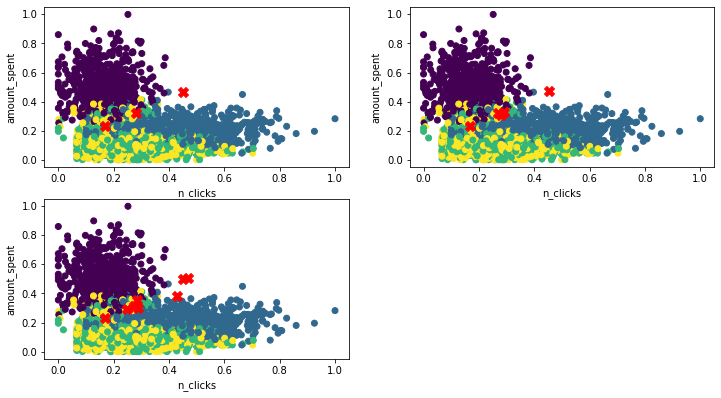

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(321)
viz_clusters(kmeans_iter1)

plt.subplot(322)
viz_clusters(kmeans_iter2)

plt.subplot(323)
viz_clusters(kmeans_iter3)

- So, Yes, the end results of K-Means depends on number of clusters.

**So, how many clusters are ideal? How to pick that?**
  - Using Inertia or WCSS

#### **How to select the best model?**

- To select the best model, we need a way to evaluate a K-Means model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets.

- But at least we can measure the distance between each instance and its centroid. This is the idea behind the **inertia metric**. The smaller the inertia value, the more coherent are the different clusters.

- The K-means algorithm aims to choose centroids that minimize the **inertia**, or **within-cluster sum-of-squares** criterion:

  - ${\sum_{i=0}^N min(||x_i - C_j||^2)}$ where;

    - N: No. of samples in dataset <br>
    - $x_i$ : Data Sample i <br>
    - $C_j$ : Centeroid of Cluster j



In [ ]:
kmeans_iter1.inertia_

280.16509626121075

In [ ]:
kmeans_iter3.inertia_

195.24159155451287

**As we increase the number of clusters, inertia decreases.**

**So, does that mean we should keep increasing the number of clusters for better performance?**

- No, we cannot simply take the value of **K** that minimizes the inertia, since it keeps getting lower as we increase **K**.
- Because, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be.


### **Let's experiment with different number of clusters and plot their Inertia**

- Calculate the Within Cluster Sum of Squared Errors (WCSS) for different values of K
- Choose the K for which WCSS first starts to diminish.

**The steps can be summarized in the below steps:**
1. Perform K-Means clustering for different values of K by varying K from 1 to 10 clusters.
2. For each K, calculate the total within-cluster sum of square (WCSS).
3. Plot the curve of WCSS vs the number of clusters K.
4. The inflectionion point(elbow) in the plot is generally considered to be an indicator of the appropriate number of clusters.


In [ ]:
# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

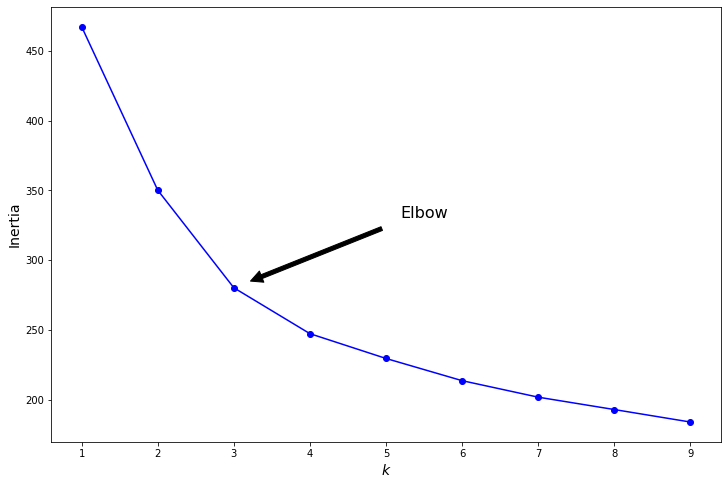

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

- Inflection point is near 3 or 4 where the drops sharply and then slows down
- 3 would be a good choice, any lower value would be dramatic, while any higher value would not help much.

  **The elbow is found when the dataset becomes flat or linear after applying the cluster analysis algorithm.**

But it's not a very precise method

- Elbow curve still relies on human interpretaion of where we see the slope changing.
- It gives a rough estimate only.

Let's try to evaluate the algorithm for different values of k using Silhouette scores.

In [ ]:
from sklearn.metrics import silhouette_score

## silhouette score for 4 clusters
silhouette_score(X, kmeans.labels_)

0.2108404992330738

In [ ]:
## plot for different values of K
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

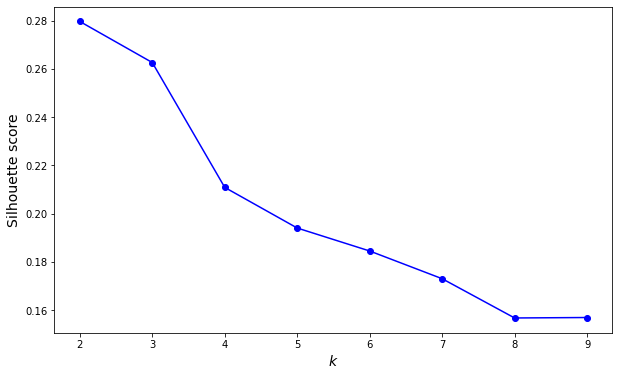

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

- We should pick 2 or 3 because after 3 there is a significant drop in the scores after 3.

- According to Elbow curve we wanted to pick 3 or 4, but according to Silhouette we can pick 2 or 3 therefore by taking common we can use 3.

- Even if we try to analyze the line polar curve, we can observe that the clusters 0 and 1 are quite the same except the difference in days after registration.

The strategy to pick 'K' should be:
1. Use the Silhouette score curve.
2. Use the elbow method.
3. Most importantly use the domain analysis.

The combination of the above 3 should be used for picking the right k.

**Note:** Silhouette Coefficient is only defined if number of labels is `2 <= n_labels <= n_samples - 1`.

## Closing Notes

- In next lecture, we'll study problems associated with Lloyd's algorithm in detail and techniques available as a work around to limitations of Llyod's Algorithm.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/146/original/Screenshot_2022-07-29_at_4.26.11_PM.png?1659091715' height = '500' width = '800'>

In [ ]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering


# create clusters
hc_2020 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
y_pred = hc_2020.fit_predict(df)

In [ ]:
y_pred

array([2, 2, 0, ..., 2, 1, 0])

In [ ]:
viz_df = df
viz_df['Y_Predicted'] = y_pred

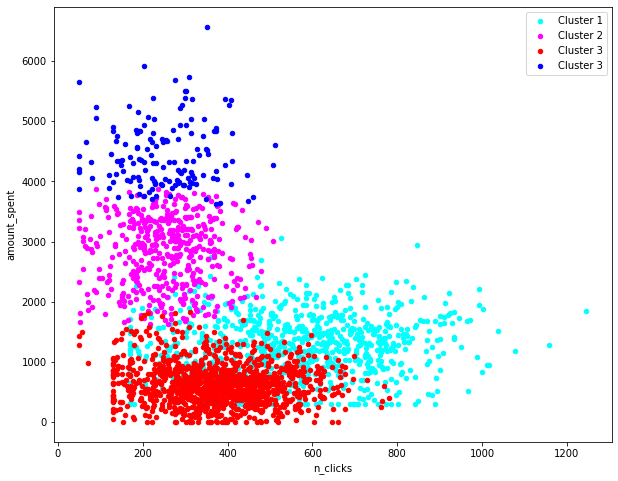

In [ ]:
rfig, ax = plt.subplots(figsize=(10,8))
plt.scatter(viz_df[viz_df['Y_Predicted'] == 0]['n_clicks'], viz_df[viz_df['Y_Predicted'] == 0]['amount_spent'], s=20, c='Cyan', label='Cluster 1')
plt.scatter(viz_df[viz_df['Y_Predicted'] == 1]['n_clicks'], viz_df[viz_df['Y_Predicted'] == 1]['amount_spent'], s=20, c='Magenta', label='Cluster 2')
plt.scatter(viz_df[viz_df['Y_Predicted'] == 2]['n_clicks'], viz_df[viz_df['Y_Predicted'] == 2]['amount_spent'], s=20, c='Red', label='Cluster 3')
plt.scatter(viz_df[viz_df['Y_Predicted'] == 3]['n_clicks'], viz_df[viz_df['Y_Predictedt'] == 3]['amount_spent'], s=20, c='Blue', label='Cluster 3')
plt.xlabel('n_clicks')
plt.ylabel('amount_spent')
plt.legend()
plt.show()